In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
data = pd.read_csv('AppleStore.csv')
data.head(10)

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45
5,6,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,Games,47,1
6,7,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,Finance,37,19
7,8,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,Music,37,1
8,9,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,Utilities,37,1
9,10,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,Games,38,10


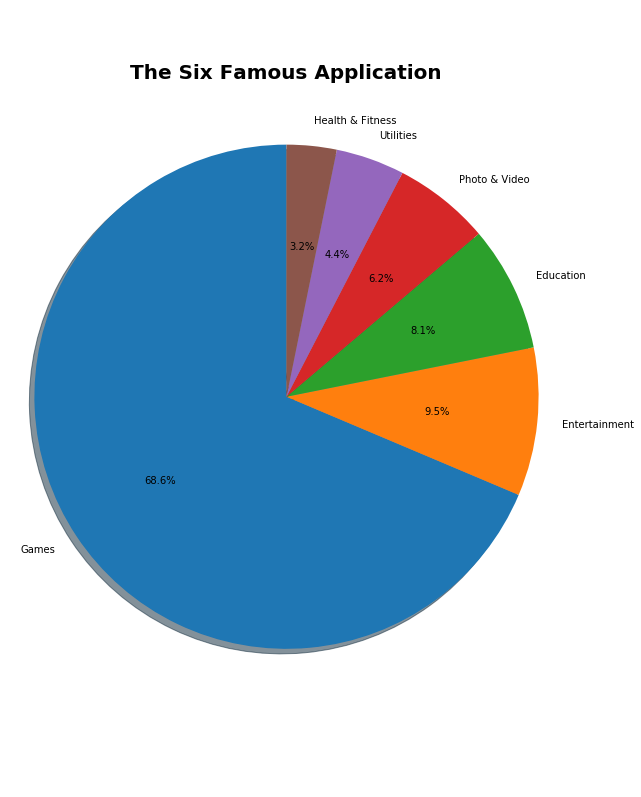

In [3]:
#how much application have from six popular domains
import matplotlib.pyplot as plt

pd=data['prime_genre'].value_counts()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels ='Games', 'Entertainment', 'Education', 'Photo & Video','Utilities', 'Health & Fitness'
sizes = [3862,535,453,349,248,180]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,15))
fig1.subplots_adjust(top=0.85)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("The Six Famous Application",fontsize=20,fontweight='bold',position=(0.5,0.9) )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

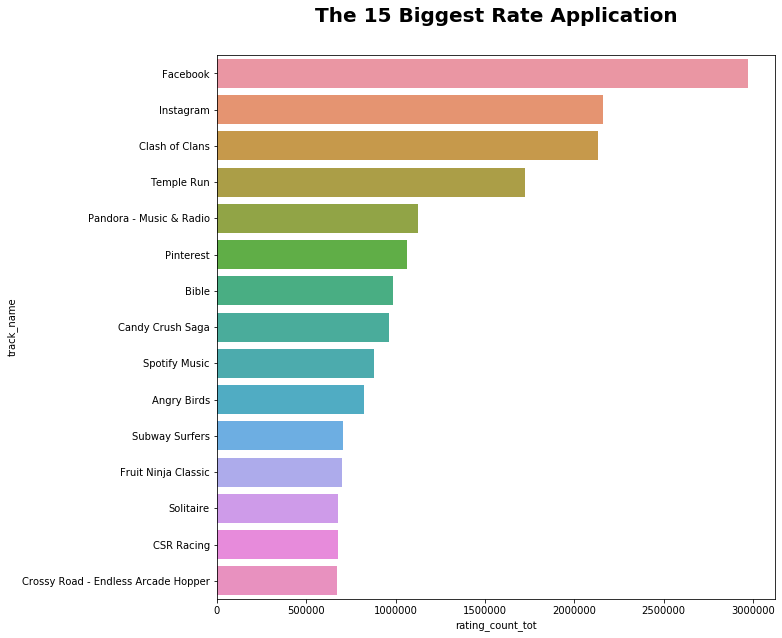

In [4]:
#### the number of the participated at choose
pd=data.nlargest(15, 'rating_count_tot')
fig, ax = plt.subplots(figsize=(10,10))
x=pd['rating_count_tot']
y=pd['track_name']
ax.set_title("The 15 Biggest Rate Application",fontsize=20,fontweight='bold',position=(0.5,1.05) )
sns.barplot(x,y)

C:\Users\eviat\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eviat\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


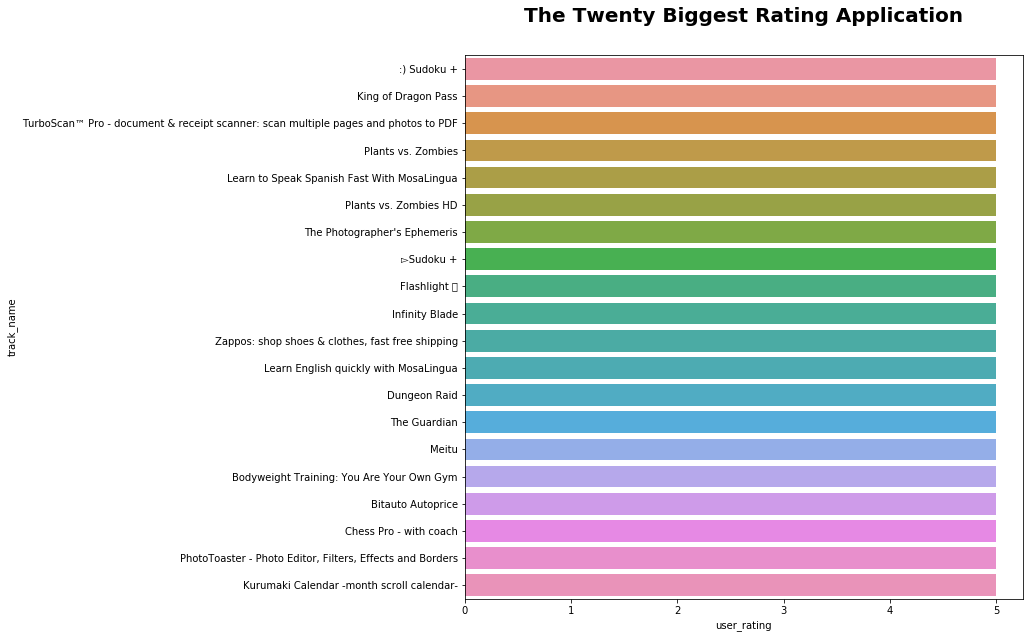

In [5]:
##the best twenty rate application
fig, ax = plt.subplots(figsize=(10,10))
pd=data.nlargest(20, 'user_rating')
x=pd['user_rating']
y=pd['track_name']
ax.set_title("The Twenty Biggest Rating Application",fontsize=20,fontweight='bold',position=(0.5,1.05) )
sns.barplot(x,y)

Text(0.5, 1.1, 'The effect of free application')

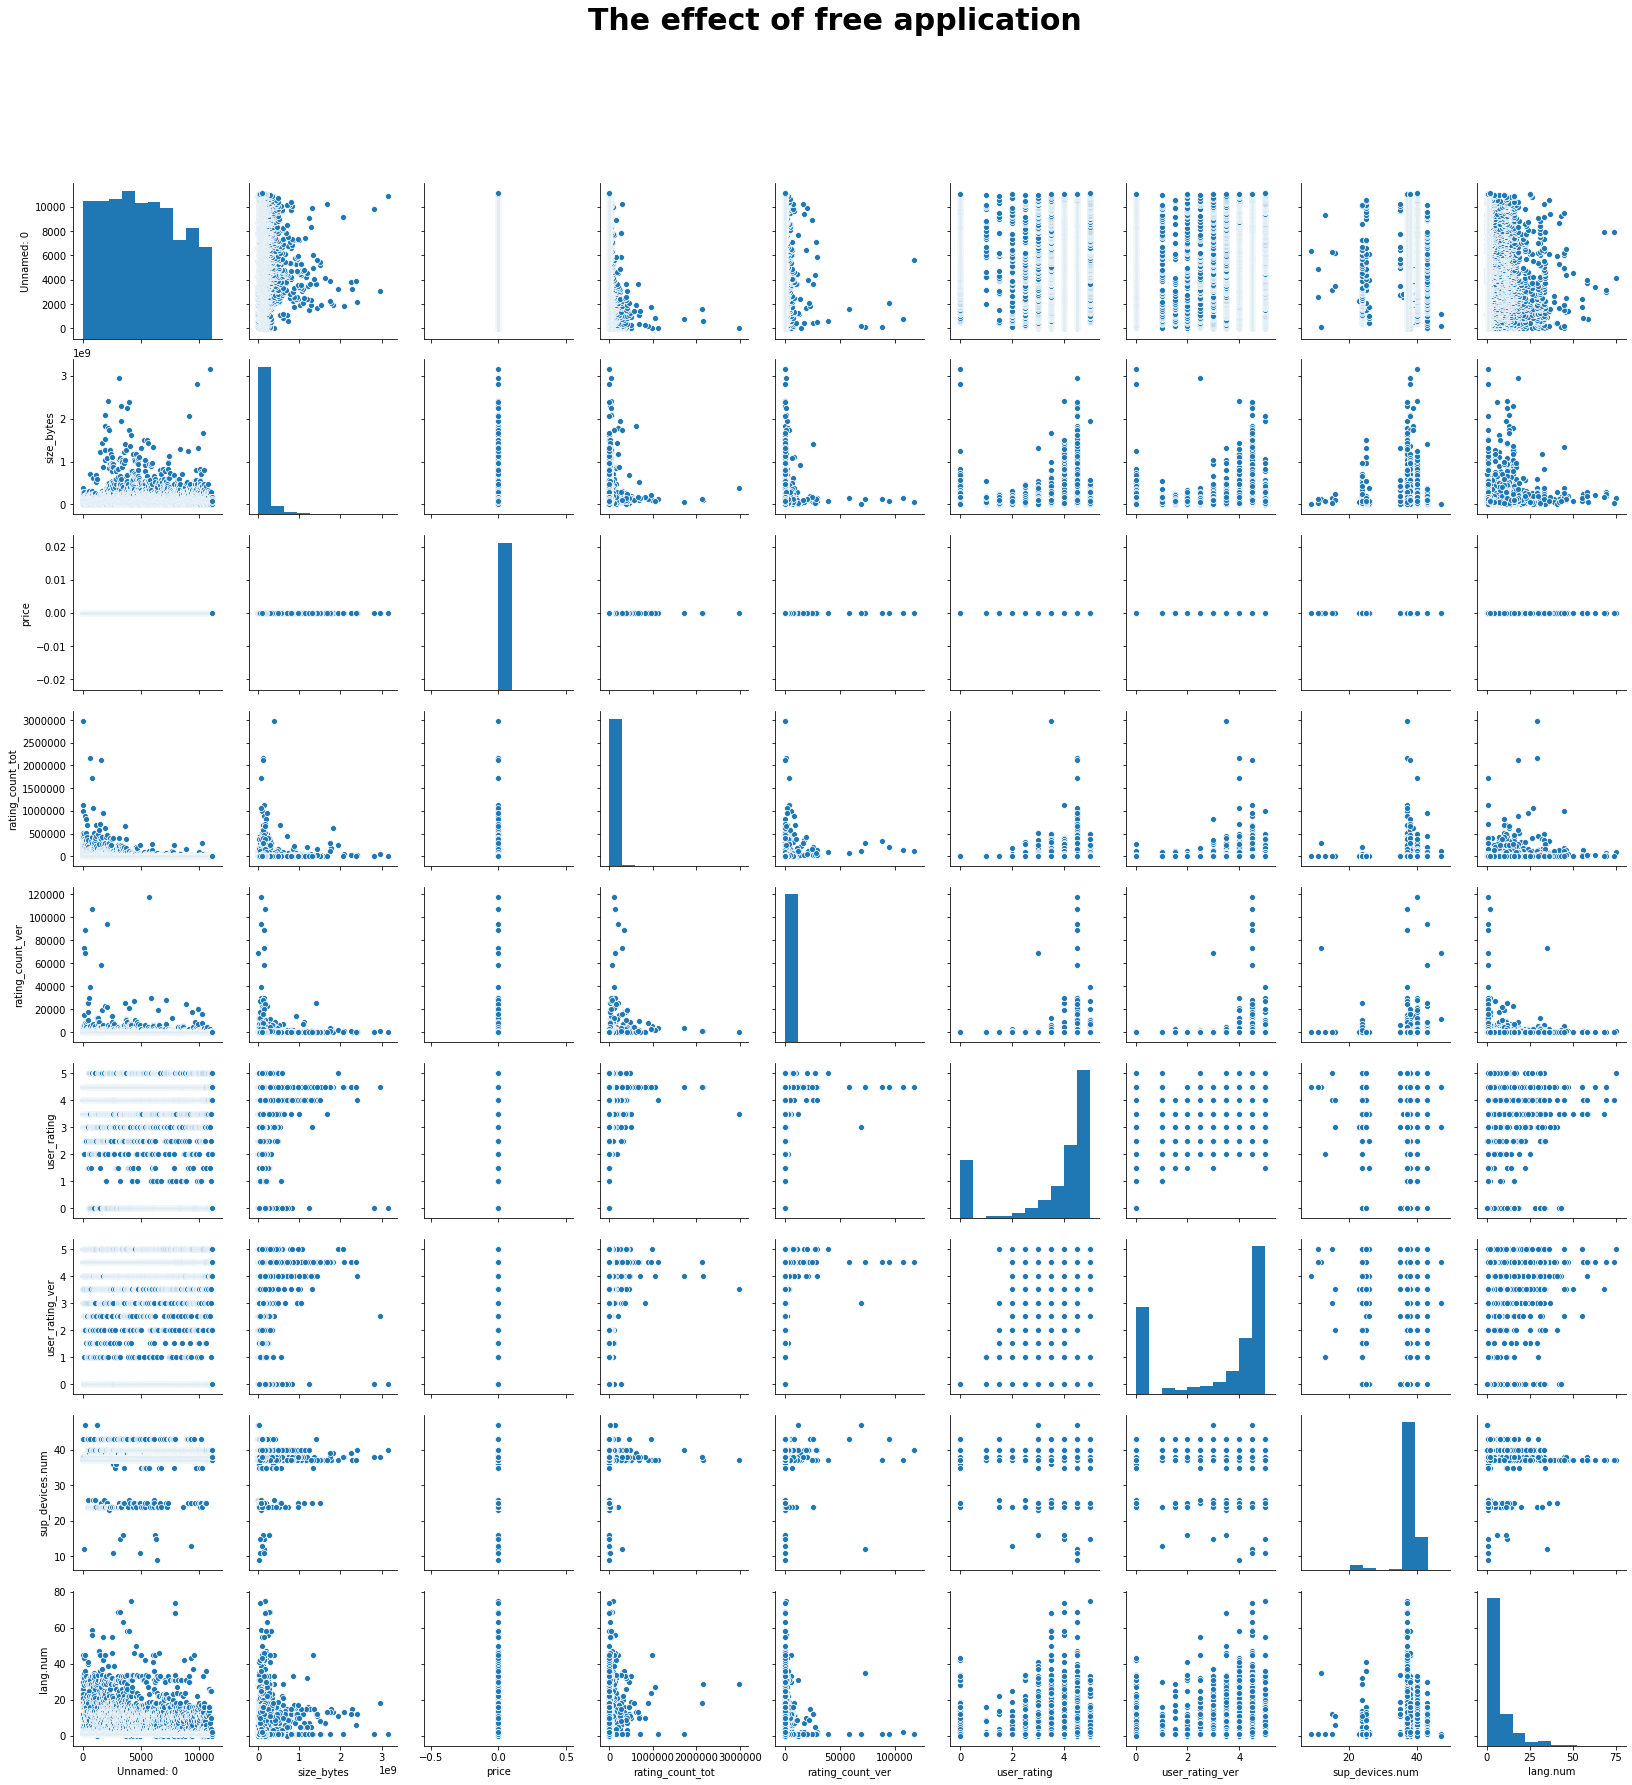

In [6]:
## pairpot on free application
without_price=data[data['price']==0]
g = sns.pairplot(without_price).fig.suptitle("The effect of free application"
                                             ,fontsize=30,fontweight= 'heavy' ,position=(0.5,1.1))
g

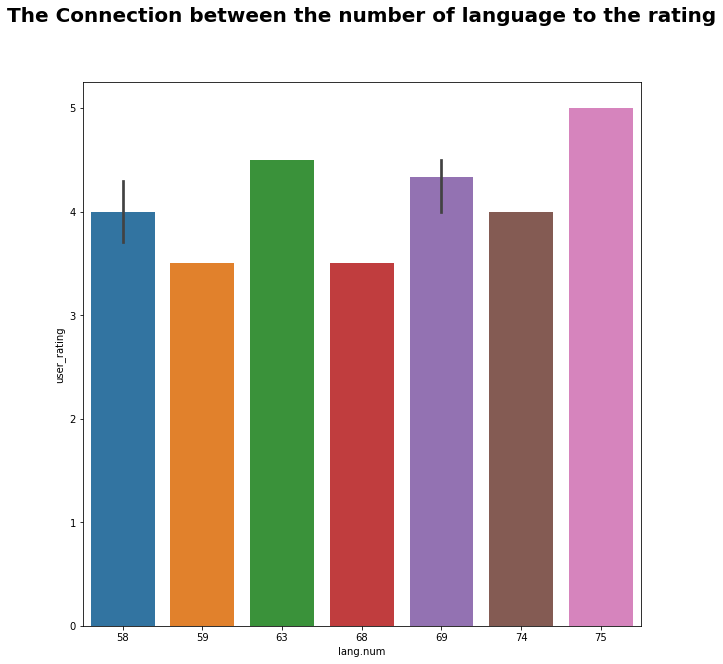

In [7]:
#the connection between the number language of the application on her succsses
pd=data.nlargest(20, 'lang.num')
x=pd['lang.num']
y=pd['user_rating']
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("The Connection between the number of language to the rating",fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
sns.barplot(x,y)

C:\Users\eviat\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.1, 'The connection between the number of support devices and the rating')

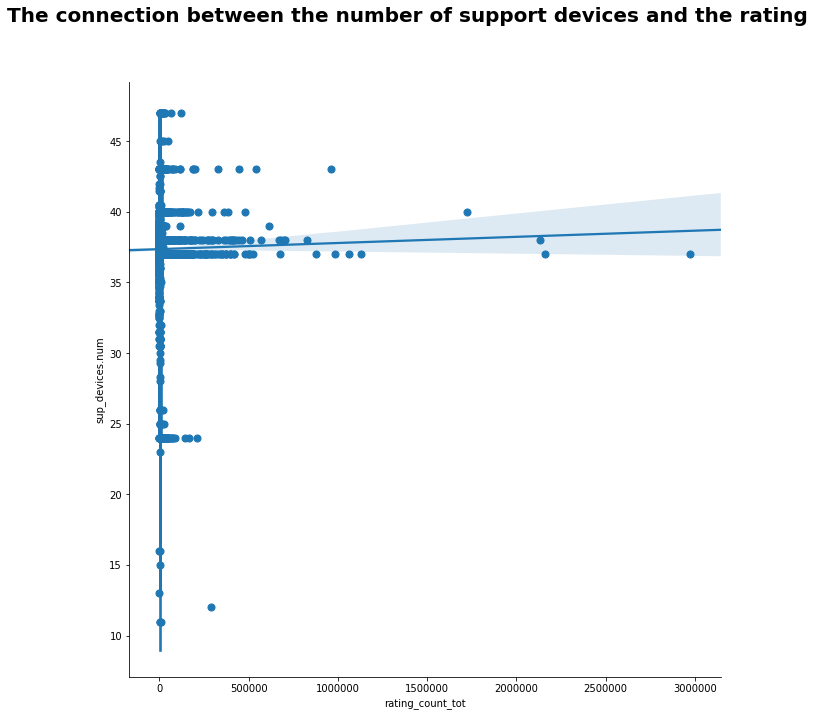

In [8]:
##the connecttion between the number of support devices and the rating
sns.lmplot(x = 'rating_count_tot', y = 'sup_devices.num',data = data,palette="Set1",size=9, x_estimator=np.mean).fig.suptitle("The connection between the number of support devices and the rating"
                                                                                                                             ,fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))

Text(0.5, 0, 'number of language')

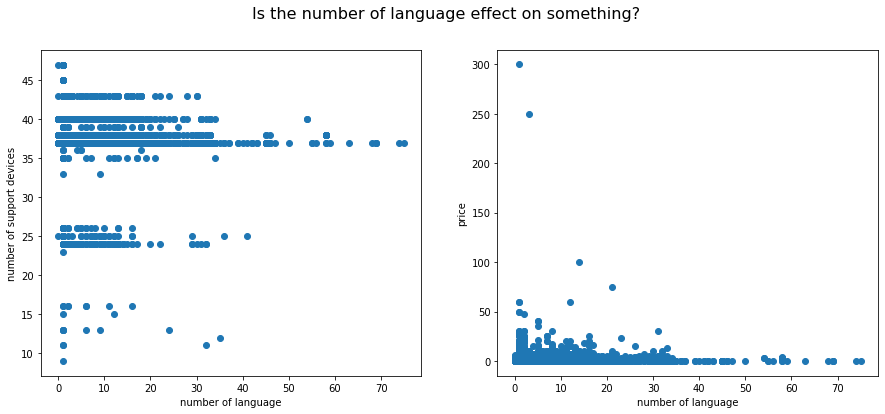

In [9]:
#the connection between the number of language to num of suppport devices
y=data['sup_devices.num']
x=data['lang.num']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Default axes range
axes[0].scatter(x, y)
axes[0].set_ylabel('number of support devices')
axes[0].set_xlabel('number of language')
fig.suptitle('Is the number of language effect on something?', fontsize=16)

# Tight axes
y=data['price']
axes[1].scatter(x, y)
axes[1].axis('tight')
axes[1].set_ylabel('price')
axes[1].set_xlabel('number of language')

Text(0.5, 1.1, 'The Famous application')

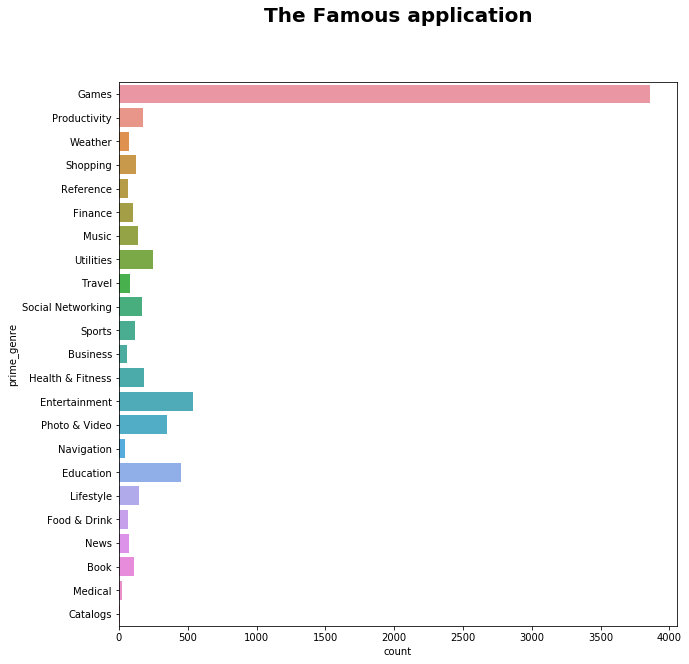

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(y='prime_genre',data=data).set_title("The Famous application"
     ,fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))

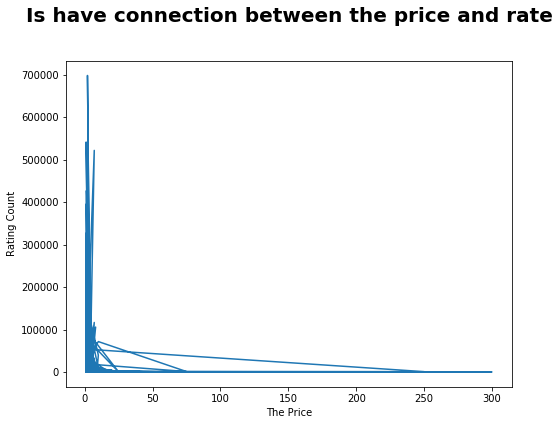

In [11]:
#is the price cause to most rating
plt.figure(figsize=(8,6))
pd=data[data['price'] != 0]
plt.xlabel('The Price')
plt.ylabel('Rating Count')
plt.title('Is have connection between the price and rate', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
x=pd['price']
y=pd['rating_count_tot']
plt.plot(x, y)

Text(0.5, 1.1, 'The effect of not free application')

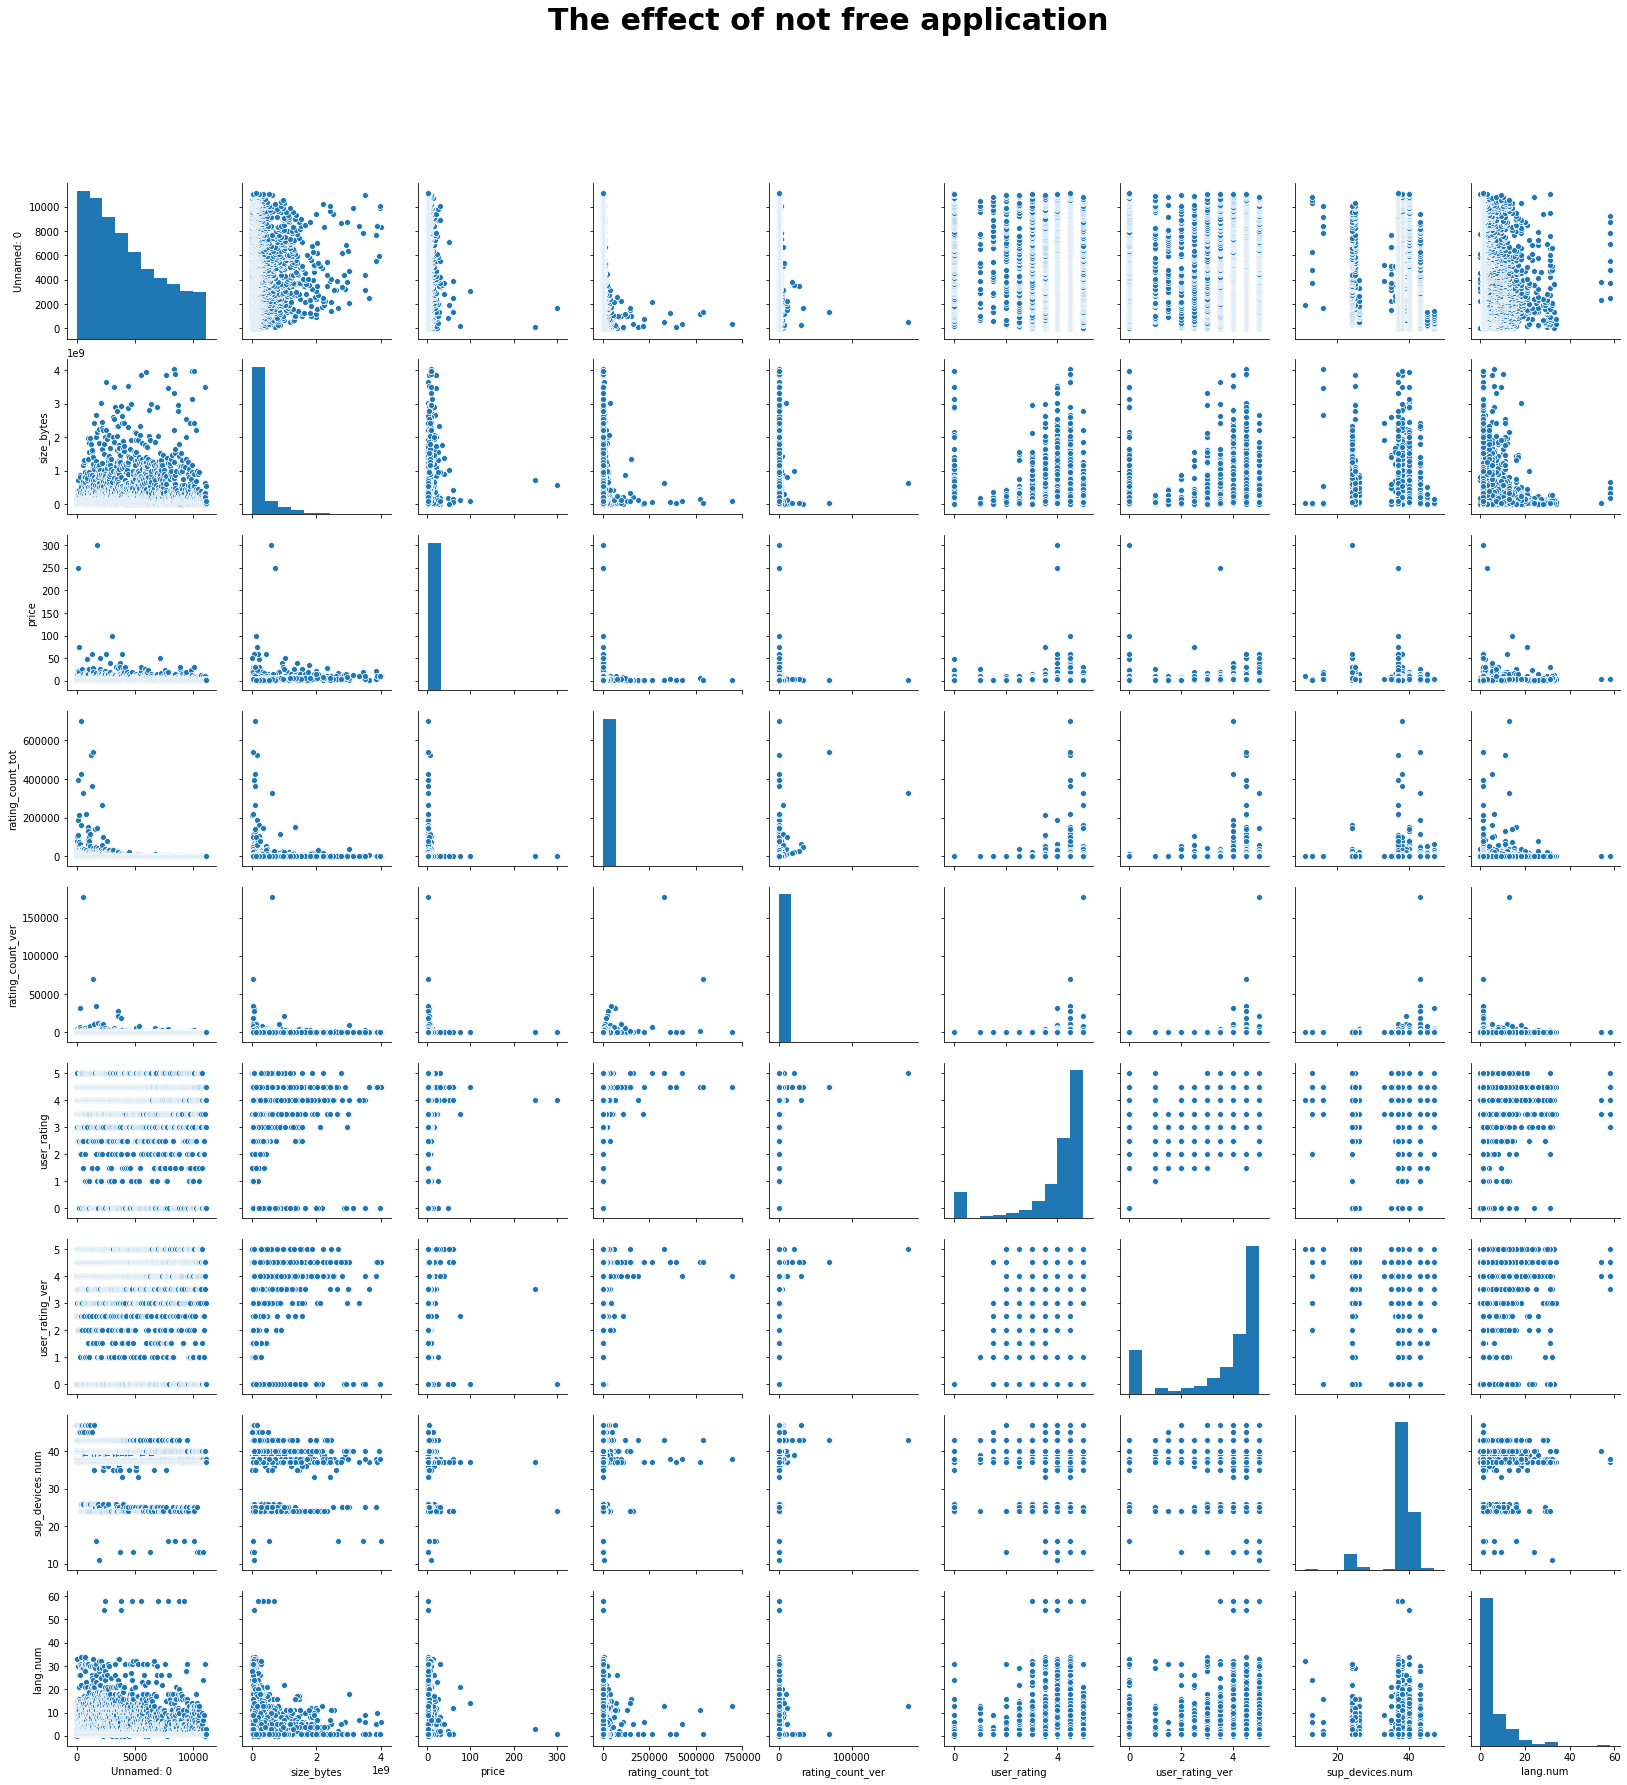

In [12]:
### pairpot on not free application
with_price=data[data['price']!=0]
g = sns.pairplot(with_price).fig.suptitle("The effect of not free application"
                                             ,fontsize=30,fontweight= 'heavy' ,position=(0.5,1.1))
g

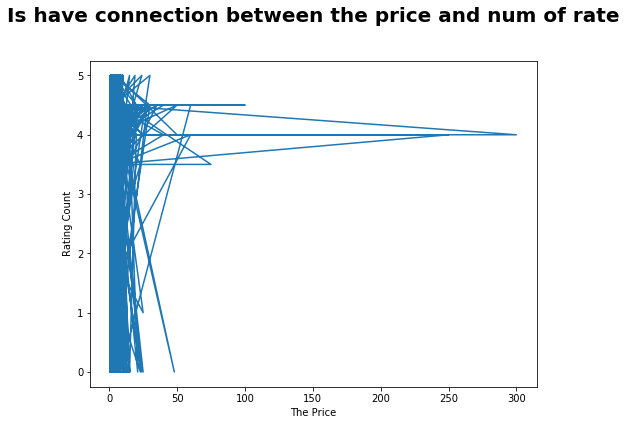

In [13]:
#is the price cause to most connection
plt.figure(figsize=(8,6))
pd=data[data['price'] != 0]
plt.xlabel('The Price')
plt.ylabel('Rating Count')
plt.title('Is have connection between the price and num of rate', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
x=pd['price']
y=pd['user_rating']
plt.plot(x, y)

C:\Users\eviat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
C:\Users\eviat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


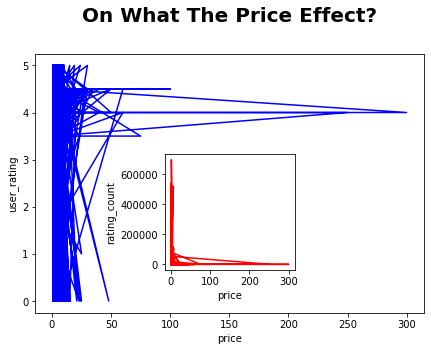

In [14]:
fig2 = plt.figure()
pd=data[data['price'] != 0]
x=pd['price']
y=pd['user_rating']
# Creating main axes - values b/w 0 & 1
axes_main = fig2.add_axes([0.1, 0.1, 0.9, 0.9])

# Creating inset axes - values b/w 0 & 1
axes_inset = fig2.add_axes([0.4, 0.25, 0.3, 0.4]) 

# Main axes
axes_main.plot(x, y, 'b')
axes_main.set_xlabel('price')
axes_main.set_ylabel('user_rating')
axes_main.set_title('On What The Price Effect?', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
plt.tight_layout()

# Inset axes
y=pd['rating_count_tot']
axes_inset.plot(x, y, 'r')
axes_inset.set_xlabel('price')
axes_inset.set_ylabel('rating_count')
plt.tight_layout()
##the most expensive application cost 300 dolars

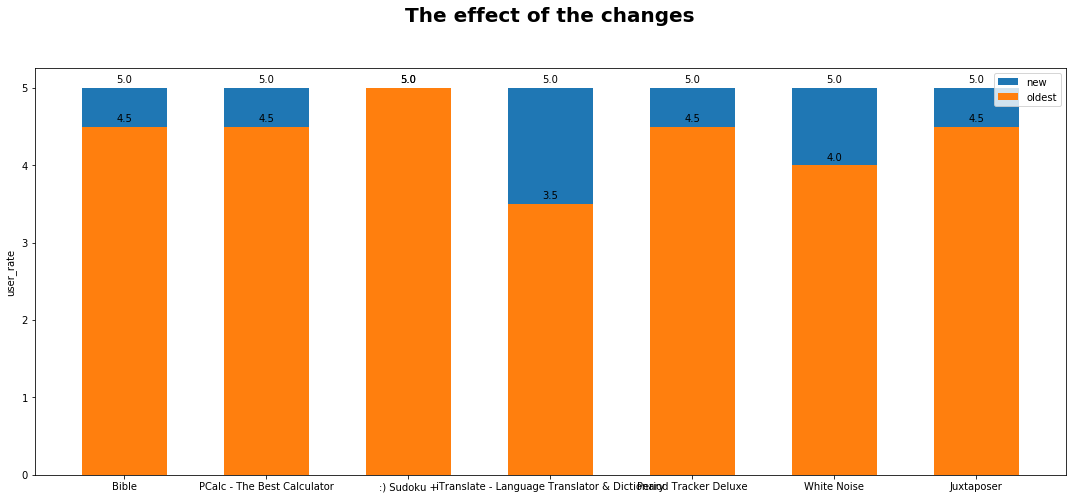

In [15]:
#the diffrences between the rate at the oldest and the new of the top application
pd=data.nlargest(7, 'user_rating_ver')
x=pd['track_name']
width = 0.6
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, pd['user_rating_ver'],width, label='new')
rects2 = ax.bar(x , pd['user_rating'],width ,label='oldest')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.set_ylabel('user_rate')
ax.set_title('The effect of the changes', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
ax.legend()
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

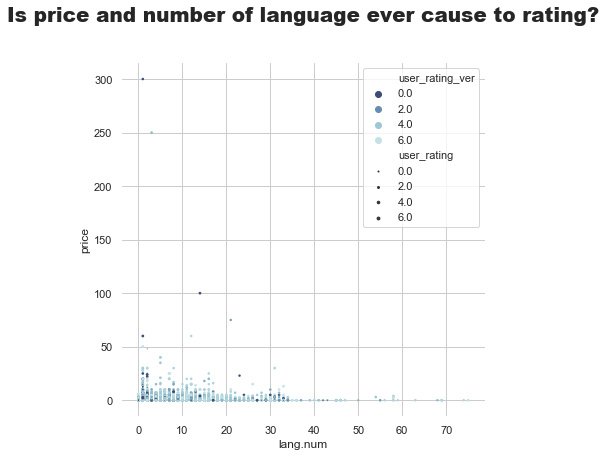

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example diamonds dataset

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
ax.set_title('Is price and number of language ever cause to rating?', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=data['lang.num'], y=data['price'],
                hue=data['user_rating_ver'], size=data['user_rating'],
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

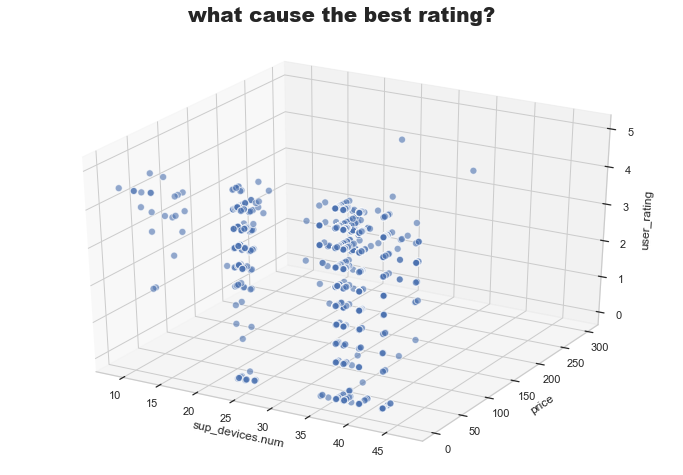

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('what cause the best rating?', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
xs = data['sup_devices.num']
ys = data['price']
zs = data['user_rating']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('sup_devices.num')
ax.set_ylabel('price')
ax.set_zlabel('user_rating')

plt.show()